In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2
%matplotlib inline

In [18]:
TRAIN_DATA_PATH = "/Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl"

# Letters based on your folder names (lowercase)
LABELS = [chr(i) for i in range(ord('a'), ord('z') + 1)]

NUM_OF_LETTERS = len(LABELS)

IMAGE_SIZE = 50     # If your old model uses 50x50
NUM_OF_CHANNELS = 1 # Grayscale
NUM_OF_DENSE_LAYER_NODES = (IMAGE_SIZE * IMAGE_SIZE) // 2

print("Labels:", LABELS)
print("Number of classes:", NUM_OF_LETTERS)


Labels: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of classes: 26


In [19]:
LABELS = sorted([
    f for f in os.listdir(TRAIN_DATA_PATH)
    if os.path.isdir(os.path.join(TRAIN_DATA_PATH, f))
])

print("Final label list:", LABELS)
print("Total classes:", len(LABELS))


Final label list: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Total classes: 26


In [ ]:
import os
print(os.getcwd())


/Users/rithumiganachimuthu/Sign_language_alphabet_recognizer


In [22]:
import os

path = "/Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl"

for f in os.listdir(path):
    old = os.path.join(path, f)
    
    if f.isalpha() and len(f) == 1:  # only letters
        new = os.path.join(path, f.upper())
        os.rename(old, new)

print("Renaming completed.")
print(sorted(os.listdir(path)))


Renaming completed.
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [26]:
!pip install imageio


In [27]:
import os
from imageio.v2 import imread

y_unique = []
x_unique = []

for alphabet in sorted(os.listdir(TRAIN_DATA_PATH)):
    alphabet_path = os.path.join(TRAIN_DATA_PATH, alphabet)

    for image in os.listdir(alphabet_path):
        image_path = os.path.join(alphabet_path, image)

        X = imread(image_path)
        x_unique.append(X)
        y_unique.append(alphabet)

        break   # Take only 1 image per letter


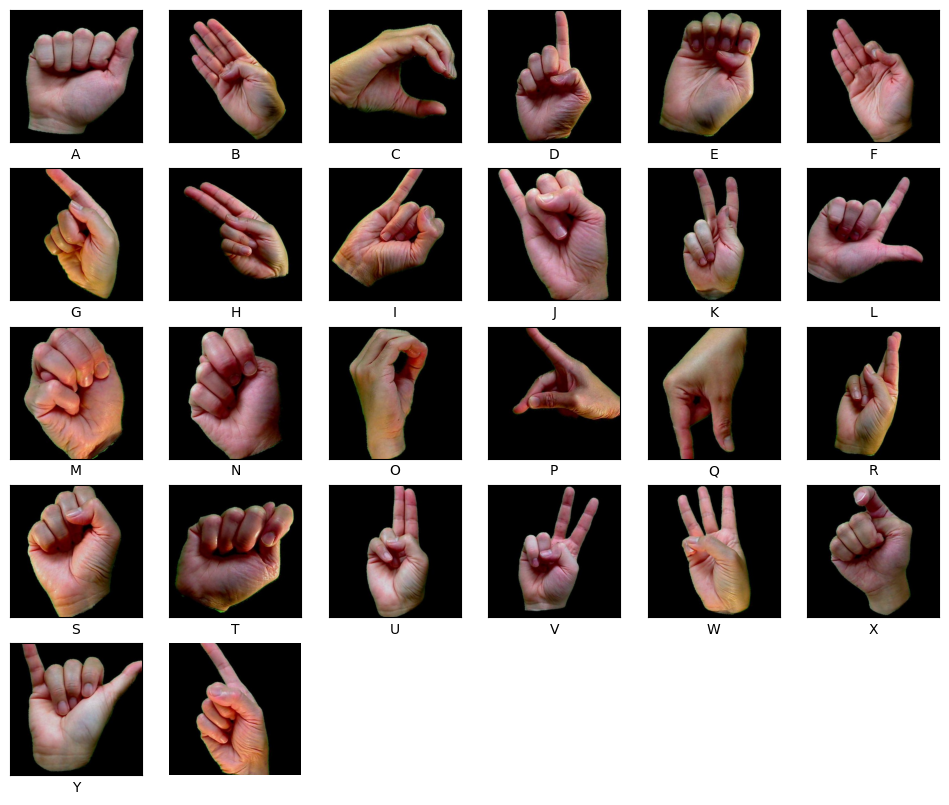

In [28]:
fig=plt.figure(figsize=(12,12))
for i in range(len(x_unique)):
    ax=fig.add_subplot(6,6,i+1)
    ax.imshow(x_unique[i])
    plt.xlabel(y_unique[i])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()
fig.savefig('alphabet')

In [ ]:
import os
import cv2
import numpy as np

IMAGE_SIZE = 50
LABELS = sorted(os.listdir(TRAIN_DATA_PATH))   # ✅ sorted A–Z

def create_data(DATA_PATH):
    x = []
    y = []
    paths = []

    for label in LABELS:
        path = os.path.join(DATA_PATH, label)
        label_index = LABELS.index(label)

        for img in os.listdir(path):
            p = os.path.join(path, img)
            paths.append(p)
            print("Loading:", p)

            img_array = cv2.imread(p)
            if img_array is None:
                print("❌ Could not read:", p)
                continue

            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
            img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))

            img_array = img_array.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)   # ✅ add channel

            x.append(img_array)
            y.append(label_index)

    return np.array(x), np.array(y)

X_train, y_train = create_data(TRAIN_DATA_PATH)


Loading: /Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl/A/a_53_rotate_4.jpeg
Loading: /Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl/A/a_2_rotate_1.jpeg
Loading: /Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl/A/a_34_rotate_8.jpeg
Loading: /Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl/A/a_21_rotate_6.jpeg
Loading: /Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl/A/a_37_rotate_10.jpeg
Loading: /Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl/A/a_22_rotate_10.jpeg
Loading: /Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl/A/a_23_rotate_8.jpeg
Loading: /Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl/A/a_36_rotate_6.jpeg
Loading: /Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl/A/a_62_rotate_1.jpeg
Loading: /Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/data/asl/A/a_44_rotate_4.jpeg

In [30]:
NUM_OF_TRAIN_IMAGES = len(X_train)
print(len(X_train))

18150


In [31]:
X_train=np.array(X_train)

In [32]:
X_train = X_train.reshape(NUM_OF_TRAIN_IMAGES, IMAGE_SIZE , IMAGE_SIZE, NUM_OF_CHANNELS)
print(X_train.shape)

(18150, 50, 50, 1)


In [33]:
X_train = X_train.astype("float32")
X_train /= 255.0


In [34]:
y_train = to_categorical(y_train, NUM_OF_LETTERS)
print(X_train.shape)


(18150, 50, 50, 1)


In [35]:
#Saving Data
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)

In [36]:
X_train=np.load("X_train.npy")
y_train=np.load("y_train.npy")

# Creating CNN Model

In [37]:
model = Sequential()

model.add(Conv2D(IMAGE_SIZE, (3, 3), padding = "same", input_shape = (IMAGE_SIZE, IMAGE_SIZE, NUM_OF_CHANNELS), activation = "relu"))
model.add(Conv2D(IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(NUM_OF_DENSE_LAYER_NODES, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_LETTERS, activation = "softmax"))

/Users/rithumiganachimuthu/Sign_language_alphabet_recognizer/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-06 09:53:25.841919: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-11-06 09:53:25.844688: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-06 09:53:25.844696: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-06 09:53:25.845521: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-06 09:53:25.846385: I tensorflow/core/common_runtime/plugg

# Compiling CNN Model

In [38]:
model.compile(
    optimizer = "adam", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy"]
)

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 50)     │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 100)    │        45,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 100)    │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12100)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1250)           │    15,126,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1250)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │        32,526 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,317,026 (58.43 MB)

 Trainable params: 15,317,026 (58.43 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [40]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 52,
    epochs = 5,
    shuffle = True
)

Epoch 1/5


2025-11-06 09:55:18.739058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


350/350 ━━━━━━━━━━━━━━━━━━━━ 60s 163ms/step - accuracy: 0.6793 - loss: 1.8612
Epoch 2/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step - accuracy: 0.8318 - loss: 27.8368
Epoch 3/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 58s 166ms/step - accuracy: 0.8719 - loss: 871.3480
Epoch 4/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step - accuracy: 0.8975 - loss: 13424.7549
Epoch 5/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 58s 166ms/step - accuracy: 0.9212 - loss: 55407.3594


# Saving Model for future use

In [41]:
#Saving Model
from keras.models import load_model
model.save('model.h5') 